In [1]:
.libPaths("/no_backup/jferrer/jmidgley/R_libs")
library(dplyr)
library(Seurat)
library(patchwork)
library(repr)
library(ggplot2)
library(ggrepel)
library(tidyr)
library(tibble)
library(showtext)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built with package ‘Matrix’ 1.7.3 but the current
version is 1.7.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: sysfonts

Loading required package: showtextdb



In [2]:
font_add("Latin Modern Math", "../data_raw/fonts/LatinmodernmathRegular.otf")
showtext_auto()
theme_set(theme_minimal(base_family = "Latin Modern Math"))

In [3]:
options(repr.plot.width = 10, repr.plot.height = 8)

In [4]:
vasa_seq_all <- readRDS("../data_processed/VASAseq/VASAseq_all_with_CellType.RDS")
vasa_seq_all

An object of class Seurat 
20551 features across 14881 samples within 1 assay 
Active assay: RNA (20551 features, 2000 variable features)
 3 layers present: scale.data, data, counts
 3 dimensional reductions calculated: pca, harmony, umap

In [5]:
unique(vasa_seq_all@meta.data$Donor)

[1] "GPRL" "HUEN" "DXAK" "DBHQ" "IEUG" "AFLO" "BKEK" "HCZL" "BJNW" "ESYP"
[11] "FTGT"

In [6]:
head(vasa_seq_all@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.5,seurat_clusters,Donor,Disease,CellType
,<chr>,<dbl>,<int>,<dbl>,<fct>,<fct>,<chr>,<chr>,<fct>
HUB-NG-v005_HUB.NG.v005_369,HUB.NG.v005,66385,6748,0,3,3,GPRL,ND,Beta
HUB-NG-v005_HUB.NG.v005_2,HUB.NG.v005,9378,2430,0,12,12,GPRL,ND,Unknown
HUB-NG-v005_HUB.NG.v005_336,HUB.NG.v005,86150,7784,0,6,6,GPRL,ND,Ductal
HUB-NG-v005_HUB.NG.v005_48,HUB.NG.v005,46151,7080,0,3,3,GPRL,ND,Beta
HUB-NG-v005_HUB.NG.v005_290,HUB.NG.v005,15393,3890,0,1,1,GPRL,ND,Ductal


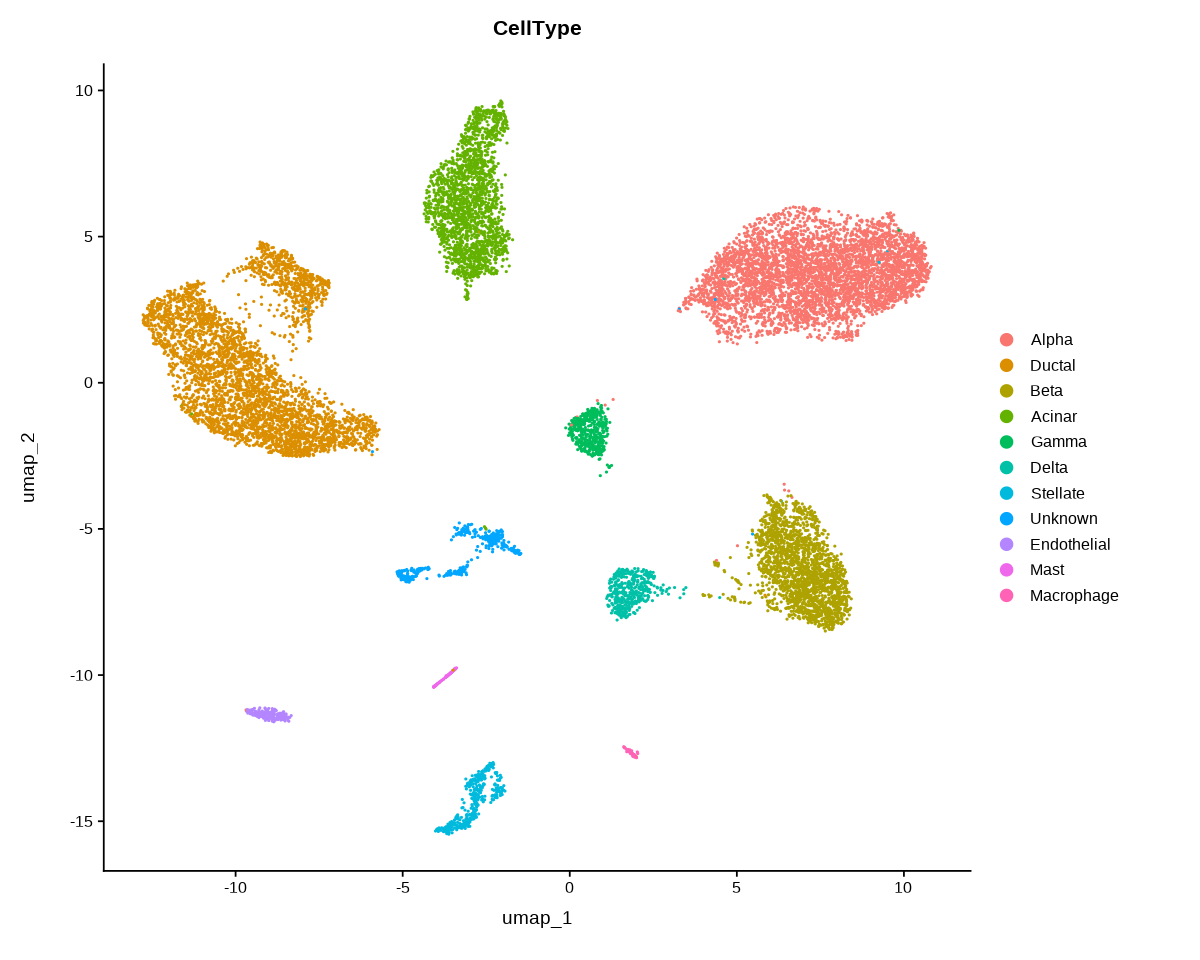

In [7]:
DimPlot(vasa_seq_all, reduction = "umap", group.by = "CellType")

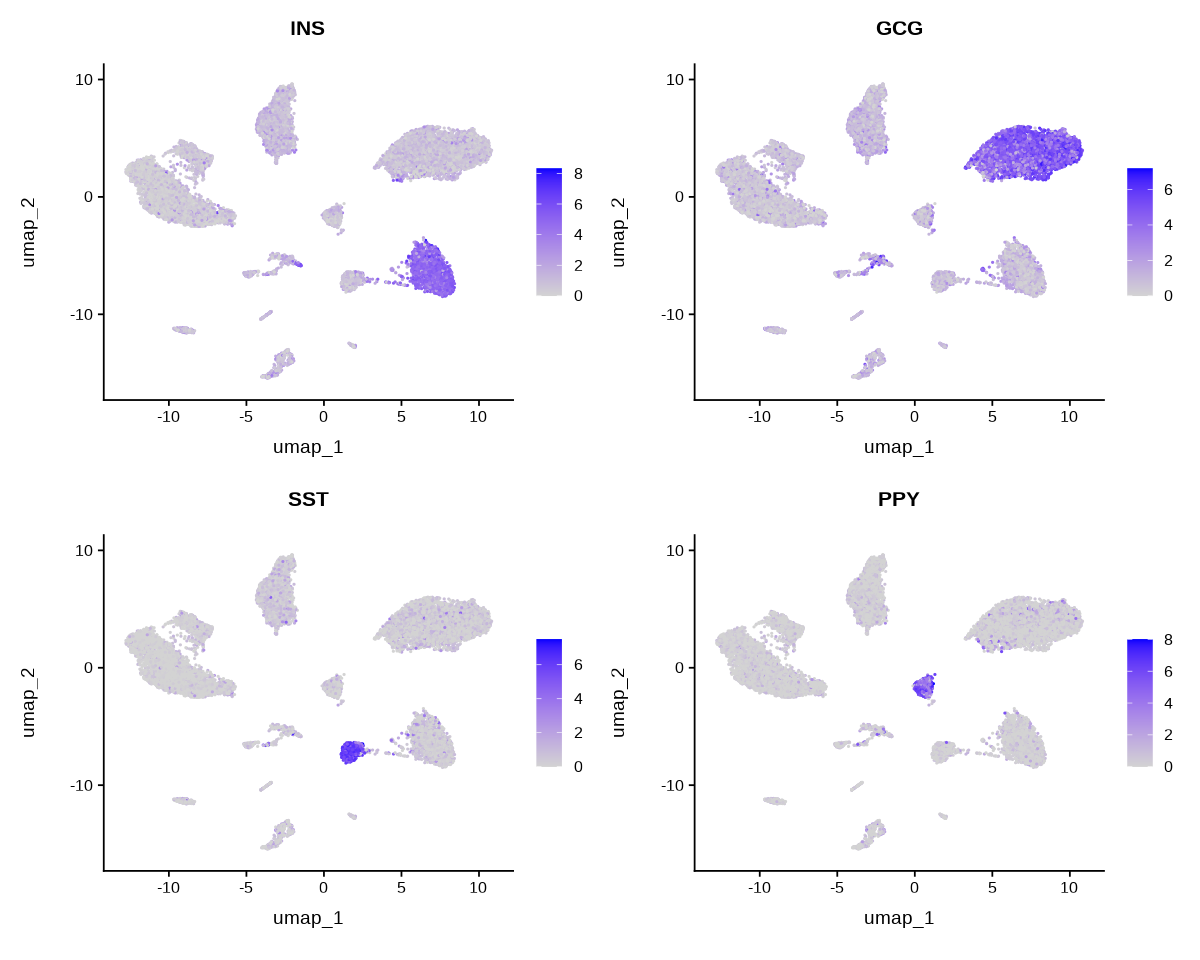

In [8]:
FeaturePlot(vasa_seq_all, features = c("INS", "GCG", "SST", "PPY"))

## Subset the data

In [9]:
# To match data used for splicing analysis
vasa_seq_ND <- subset(vasa_seq_all, subset = Disease == "ND" & CellType %in% c("Alpha", "Beta"))

In [10]:
unique(vasa_seq_ND@meta.data$Donor)

[1] "GPRL" "HUEN" "DBHQ" "AFLO" "BKEK"

In [11]:
vasa_seq_ND

An object of class Seurat 
20551 features across 2769 samples within 1 assay 
Active assay: RNA (20551 features, 2000 variable features)
 3 layers present: scale.data, data, counts
 3 dimensional reductions calculated: pca, harmony, umap

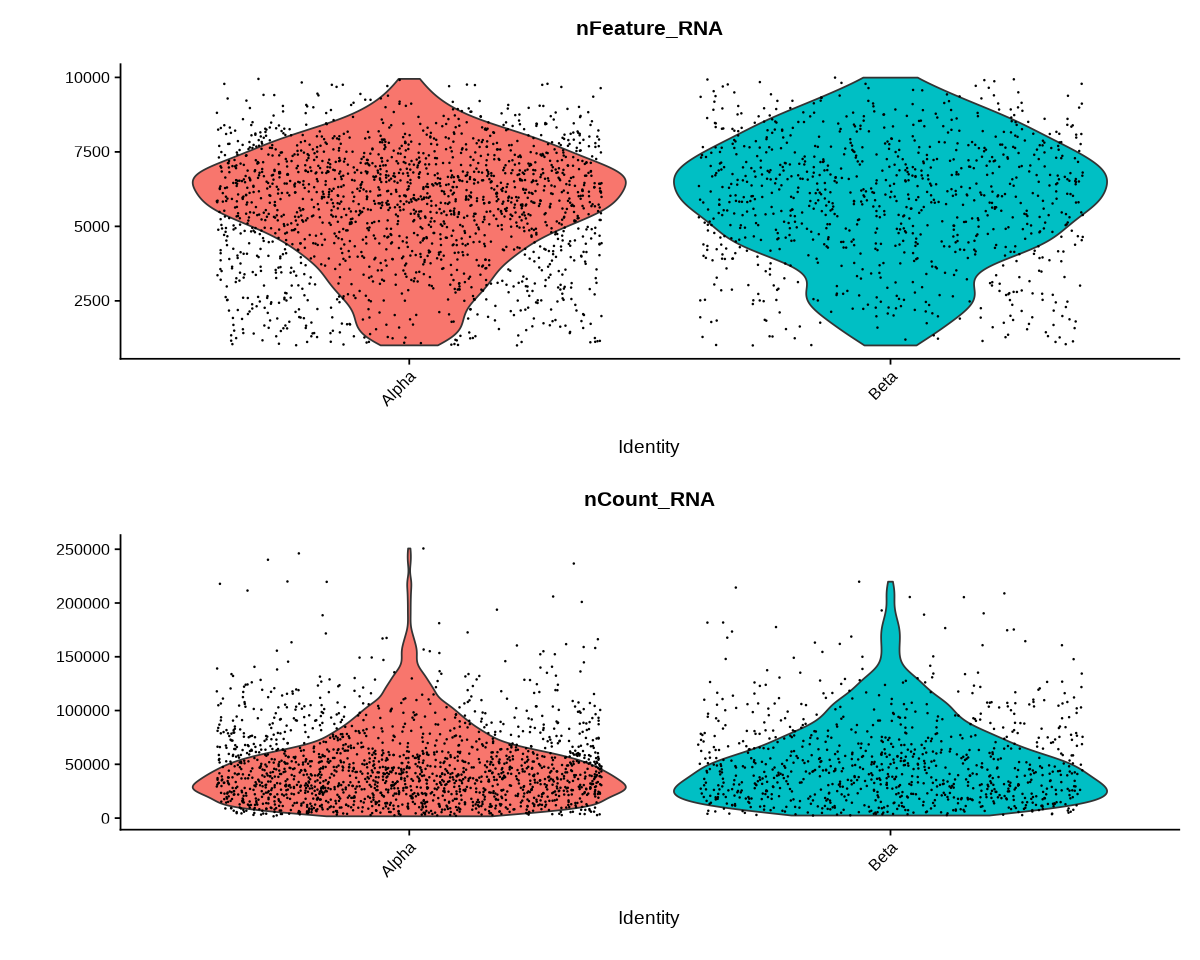

In [12]:
VlnPlot(vasa_seq_ND, features = c("nFeature_RNA", "nCount_RNA"), ncol = 1)

In [13]:
top10 <- head(VariableFeatures(vasa_seq_ND), 10)
top10

[1] "PDGFRB" "COL6A3" "MUC5B"  "REG3A"  "MMP1"   "CRP"    "HSPA6"  "PLVAP" 
 [9] "COL6A2" "OLFM4"

When using repel, set xnudge and ynudge to 0 for optimal results



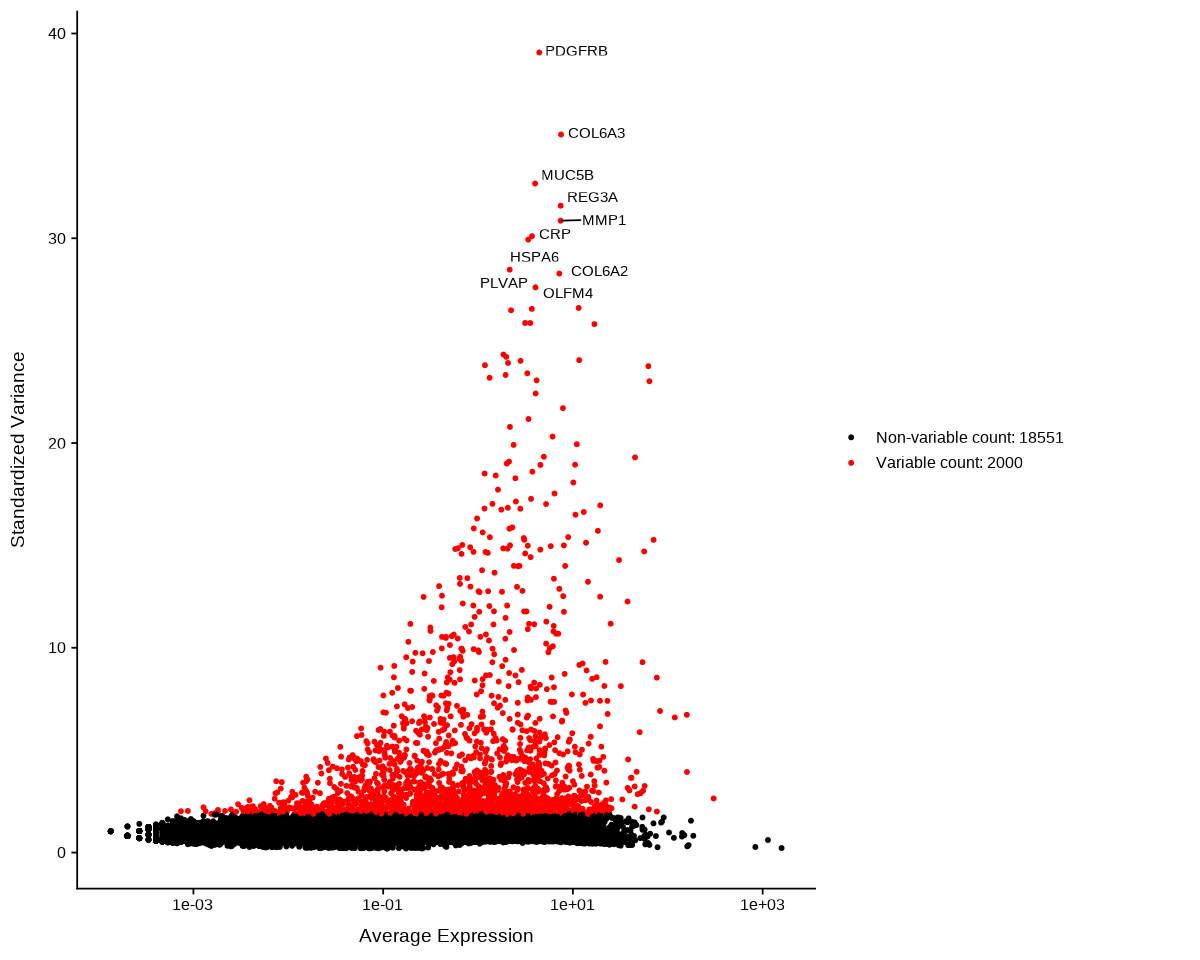

In [14]:
LabelPoints(plot = VariableFeaturePlot(vasa_seq_ND), points = top10, repel = TRUE)

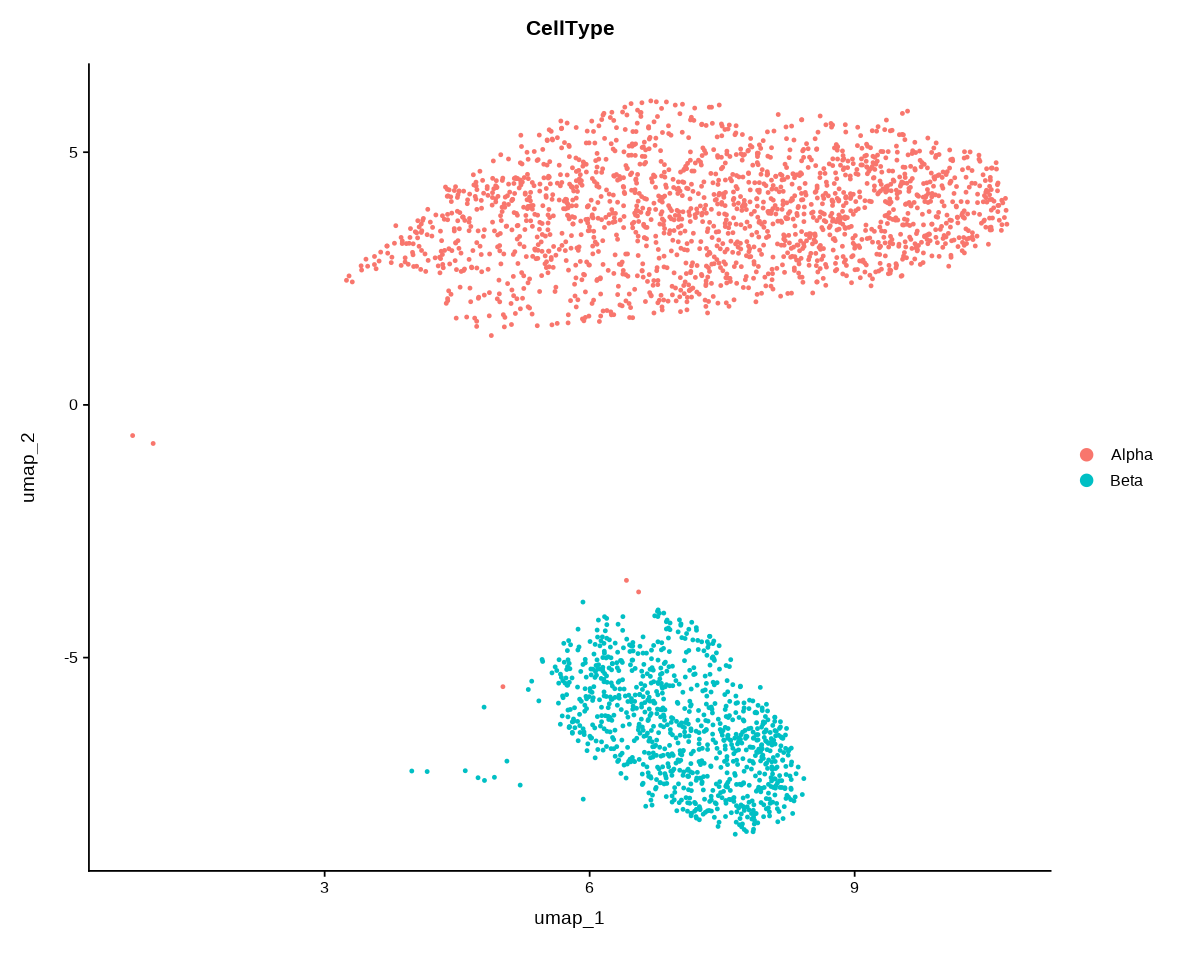

In [15]:
DimPlot(vasa_seq_ND, reduction = "umap", group.by = "CellType")

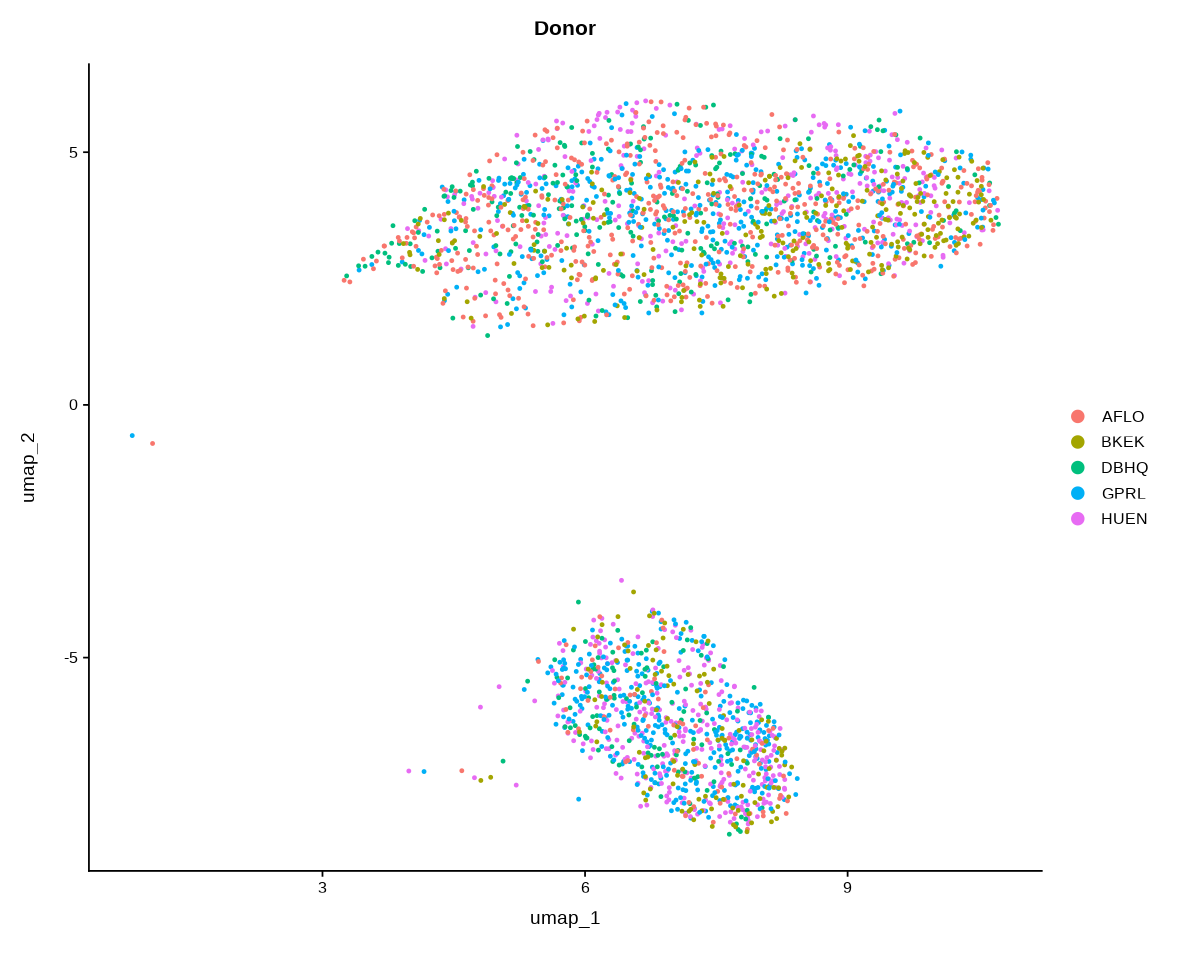

In [16]:
DimPlot(vasa_seq_ND, reduction = "umap", group.by = "Donor")

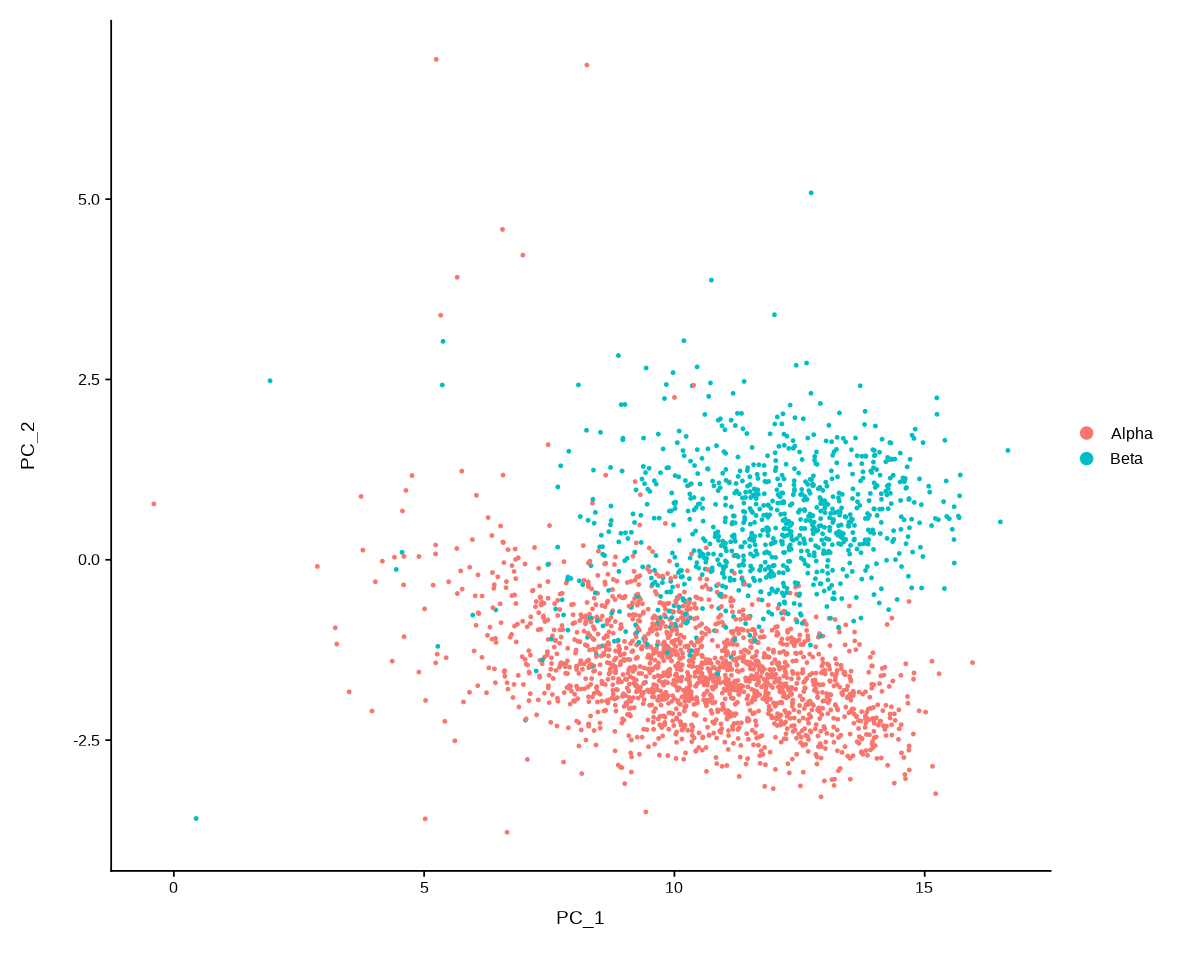

In [17]:
DimPlot(vasa_seq_ND, reduction = "pca")

In [18]:
Idents(vasa_seq_ND) <- "CellType"
levels(Idents(vasa_seq_ND))

[1] "Alpha" "Beta"

In [19]:
markers_df <- FindMarkers(vasa_seq_ND, ident.1 = "Alpha", ident.2 = "Beta")

In [20]:
markers_df$gene_name <- rownames(markers_df)

# Add significance category
markers_df$significance <- "Not Significant"
markers_df$significance[markers_df$avg_log2FC > 1.5 & markers_df$p_val_adj < 0.01] <- "Upregulated in Alpha"
markers_df$significance[markers_df$avg_log2FC < -1.5 & markers_df$p_val_adj < 0.01] <- "Upregulated in Beta"

In [21]:
markers_df

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene_name,significance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GLP1R,0,-6.172968,0.138,0.953,0,GLP1R,Upregulated in Beta
TRPM3,0,-6.359843,0.125,0.938,0,TRPM3,Upregulated in Beta
IRX2,0,6.091533,0.920,0.123,0,IRX2,Upregulated in Alpha
ZNF385D,0,-6.343712,0.149,0.939,0,ZNF385D,Upregulated in Beta
SAMD11,0,-5.760313,0.146,0.905,0,SAMD11,Upregulated in Beta
WSCD2,0,-6.723741,0.083,0.836,0,WSCD2,Upregulated in Beta
VAT1L,0,-5.077731,0.113,0.862,0,VAT1L,Upregulated in Beta
MAFA,0,-5.572707,0.112,0.850,0,MAFA,Upregulated in Beta
ADCYAP1,0,-6.306296,0.126,0.861,0,ADCYAP1,Upregulated in Beta


In [22]:
markers_df$gene_name <- gsub("-", "_", markers_df$gene_name)
markers_df$gene_name <- gsub("\\.", "-", markers_df$gene_name)

rownames(markers_df) <- markers_df$gene_name

In [23]:
markers_df %>% filter(significance == "Upregulated in Alpha")

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene_name,significance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
IRX2,0.000000e+00,6.091533,0.920,0.123,0.000000e+00,IRX2,Upregulated in Alpha
GC,0.000000e+00,6.099635,0.944,0.233,0.000000e+00,GC,Upregulated in Alpha
CLU,0.000000e+00,2.262491,0.997,0.942,0.000000e+00,CLU,Upregulated in Alpha
TTR,0.000000e+00,4.052907,1.000,0.965,0.000000e+00,TTR,Upregulated in Alpha
GCG,0.000000e+00,5.824695,0.998,0.970,0.000000e+00,GCG,Upregulated in Alpha
MYO10,2.365890e-277,4.461422,0.910,0.386,4.862141e-273,MYO10,Upregulated in Alpha
RNF144A,9.804124e-273,4.182803,0.891,0.330,2.014846e-268,RNF144A,Upregulated in Alpha
SMOC1,1.167849e-271,4.062820,0.912,0.387,2.400046e-267,SMOC1,Upregulated in Alpha
MUC13,5.474601e-258,5.104171,0.870,0.326,1.125085e-253,MUC13,Upregulated in Alpha


In [24]:
markers_df %>% filter(significance == "Upregulated in Beta")

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene_name,significance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GLP1R,0.000000e+00,-6.172968,0.138,0.953,0.000000e+00,GLP1R,Upregulated in Beta
TRPM3,0.000000e+00,-6.359843,0.125,0.938,0.000000e+00,TRPM3,Upregulated in Beta
ZNF385D,0.000000e+00,-6.343712,0.149,0.939,0.000000e+00,ZNF385D,Upregulated in Beta
SAMD11,0.000000e+00,-5.760313,0.146,0.905,0.000000e+00,SAMD11,Upregulated in Beta
WSCD2,0.000000e+00,-6.723741,0.083,0.836,0.000000e+00,WSCD2,Upregulated in Beta
VAT1L,0.000000e+00,-5.077731,0.113,0.862,0.000000e+00,VAT1L,Upregulated in Beta
MAFA,0.000000e+00,-5.572707,0.112,0.850,0.000000e+00,MAFA,Upregulated in Beta
ADCYAP1,0.000000e+00,-6.306296,0.126,0.861,0.000000e+00,ADCYAP1,Upregulated in Beta
LRFN2,0.000000e+00,-6.993765,0.054,0.789,0.000000e+00,LRFN2,Upregulated in Beta


In [25]:
unmapped_gene_name_map <- read.csv("../data_processed/unmapped_gene_name_map.csv")

In [26]:
idx <- match(markers_df$gene_name, unmapped_gene_name_map$Gene.name)
repl <- unmapped_gene_name_map$updated_gene_name[idx]
markers_df$gene_name <- ifelse(!is.na(repl), repl, markers_df$gene_name)

In [27]:
unannotated_alpha <- subset(markers_df, grepl("^HIT", gene_name) & significance == "Upregulated in Alpha")
unannotated_alpha

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene_name,significance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Peak_57069,3.856390e-116,6.648521,0.592,0.196,7.925267e-112,HIT57069-NC,Upregulated in Alpha
Peak_21558,1.507330e-105,1.868728,0.799,0.478,3.097715e-101,HIT21558-NC,Upregulated in Alpha
Peak_21563,2.180776e-57,1.783125,0.574,0.281,4.481712e-53,HIT21563-NC,Upregulated in Alpha
Peak_33420,9.570429e-51,2.810328,0.366,0.106,1.966819e-46,HIT33420-PC,Upregulated in Alpha
Peak_69653,2.269226e-45,4.531293,0.226,0.020,4.663487e-41,HIT69653-PC,Upregulated in Alpha
Peak_34892,4.432166e-41,3.967283,0.199,0.014,9.108545e-37,HIT34892-NC,Upregulated in Alpha
Peak_67350,4.556891e-40,1.810459,0.450,0.210,9.364867e-36,HIT67350-NC,Upregulated in Alpha
Peak_20728,7.299421e-40,3.541148,0.240,0.043,1.500104e-35,HIT20728-NC,Upregulated in Alpha
Peak_35310-35311,8.206952e-35,3.683013,0.231,0.049,1.686611e-30,HIT35310-35311-NC,Upregulated in Alpha


In [28]:
# Unannotated protein coding genes
subset(unannotated_alpha, grepl("PC", gene_name))

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene_name,significance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Peak_33420,9.570429e-51,2.810328,0.366,0.106,1.966819e-46,HIT33420-PC,Upregulated in Alpha
Peak_69653,2.269226e-45,4.531293,0.226,0.020,4.663487e-41,HIT69653-PC,Upregulated in Alpha
Peak_29170-29184,1.496848e-29,2.015203,0.418,0.231,3.076172e-25,HIT29170-29184-PC,Upregulated in Alpha
Peak_40378,2.500612e-11,1.688931,0.121,0.043,5.139008e-07,HIT40378-PC,Upregulated in Alpha
Peak_67518,4.370330e-11,4.586824,0.057,0.005,8.981464e-07,HIT67518-PC,Upregulated in Alpha
Peak_14974,6.814277e-09,1.930367,0.140,0.067,1.400402e-04,HIT14974-PC,Upregulated in Alpha
Peak_76832,1.578600e-08,1.706494,0.080,0.026,3.244182e-04,HIT76832-PC,Upregulated in Alpha


In [29]:
unannotated_beta <- subset(markers_df, grepl("^HIT", gene_name) & significance == "Upregulated in Beta")
unannotated_beta

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene_name,significance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Peak_56843,3.972465e-204,-3.826916,0.084,0.611,8.163812e-200,HIT56843-PC,Upregulated in Beta
Peak_75996,3.232535e-183,-6.510822,0.008,0.418,6.643183e-179,HIT75996-NC,Upregulated in Beta
Peak_72619,9.524051e-172,-3.108188,0.074,0.547,1.957288e-167,HIT72619-NC,Upregulated in Beta
Peak_16025,1.967998e-149,-5.161232,0.026,0.398,4.044433e-145,HIT16025-NC,Upregulated in Beta
Peak_51116,6.429223e-132,-3.587187,0.126,0.529,1.321270e-127,HIT51116-NC,Upregulated in Beta
Peak_15831-15833,1.929358e-129,-5.918319,0.012,0.324,3.965024e-125,HIT15831-15833-NC,Upregulated in Beta
Peak_72656-72657,2.610991e-98,-4.297752,0.008,0.248,5.365848e-94,HIT72656-72657-PC,Upregulated in Beta
Peak_7831,7.805887e-95,-2.356960,0.295,0.639,1.604188e-90,HIT7831-NC,Upregulated in Beta
Peak_72615,2.552533e-74,-2.622796,0.035,0.271,5.245711e-70,HIT72615-NC,Upregulated in Beta


In [30]:
# Unannotated protein coding genes
subset(unannotated_beta, grepl("PC", gene_name))

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene_name,significance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Peak_56843,3.972465e-204,-3.826916,0.084,0.611,8.163812e-200,HIT56843-PC,Upregulated in Beta
Peak_72656-72657,2.610991e-98,-4.297752,0.008,0.248,5.365848e-94,HIT72656-72657-PC,Upregulated in Beta
Peak_49906,1.583919e-63,-5.013505,0.008,0.173,3.255111e-59,HIT49906-PC,Upregulated in Beta
Peak_30026,1.845871e-36,-1.885829,0.369,0.552,3.793449e-32,HIT30026-PC,Upregulated in Beta
Peak_64574-64575,2.198881e-13,-2.729081,0.008,0.051,4.518919e-09,HIT64574-64575-PC,Upregulated in Beta
Peak_594,6.270266e-10,-4.227424,0.001,0.025,1.288602e-05,HIT594-PC,Upregulated in Beta


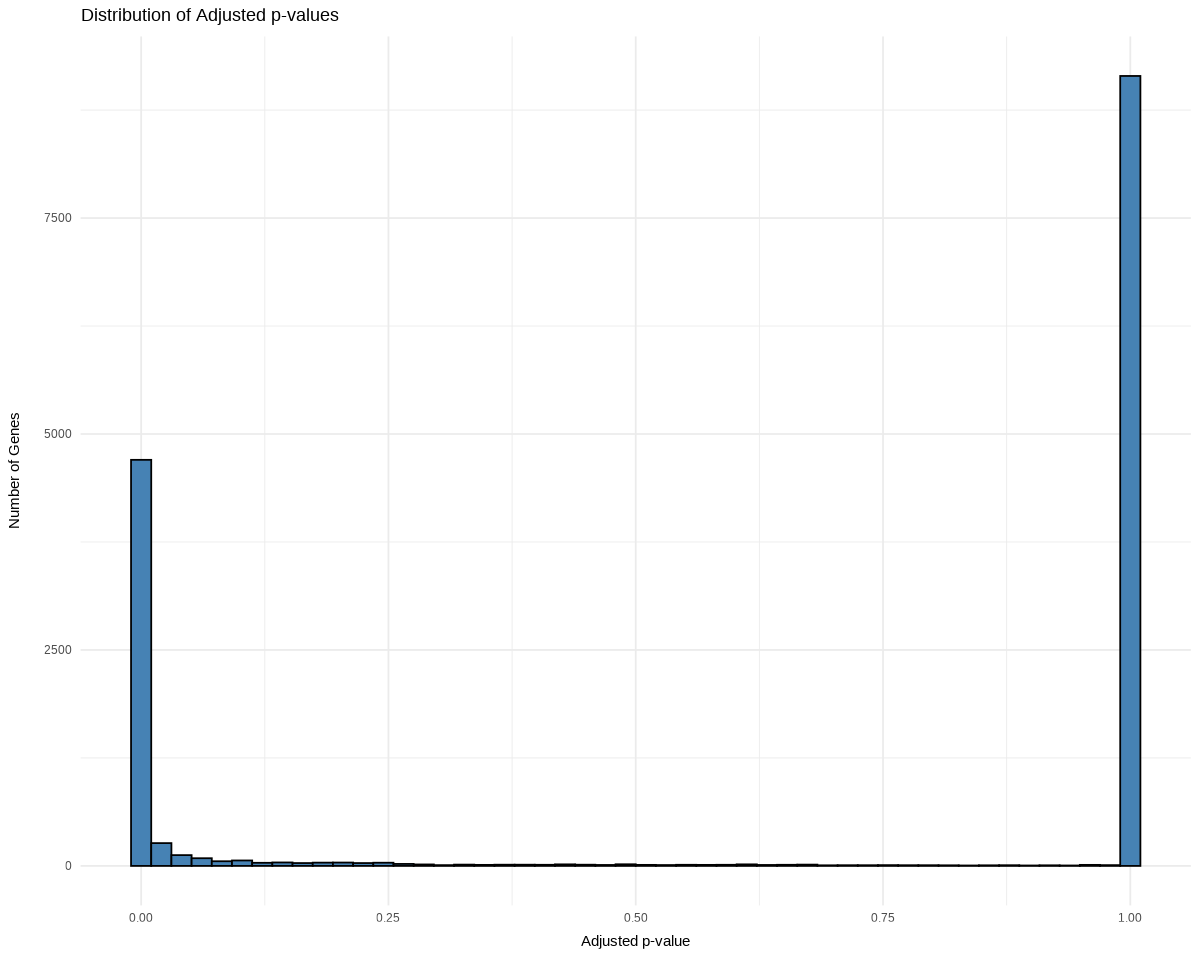

In [31]:
ggplot(markers_df, aes(x = p_val_adj)) +
  geom_histogram(bins = 50, fill = "steelblue", color = "black") +
  theme_minimal() +
  xlab("Adjusted p-value") +
  ylab("Number of Genes") +
  ggtitle("Distribution of Adjusted p-values")

In [32]:
ins <- subset(markers_df, gene_name == "INS")
gcg <- subset(markers_df, gene_name == "GCG")

top_genes <- rbind(ins, gcg)

# Create categorical alpha variable
plot_df <- markers_df
plot_df$annotation_status <- "Annotated"
plot_df$annotation_status[plot_df$gene_name %in% unannotated_alpha$gene_name] <- "Unannotated"
plot_df$annotation_status[plot_df$gene_name %in% unannotated_beta$gene_name]  <- "Unannotated"

# Plot
# Create plot object
p <- ggplot(plot_df, aes(x = avg_log2FC, y = -log10(p_val))) +
  geom_point(
    aes(color = significance, alpha = annotation_status),
    size = 2,
    show.legend = TRUE
  ) +
  geom_text_repel(
    data = top_genes,
    aes(label = gene_name, color = significance),
    size = 5,
    max.overlaps = Inf,
    show.legend = FALSE
  ) +
  coord_cartesian(clip = "off") +
  scale_color_manual(
    name = "Significance",
    values = c(
      "Upregulated in Alpha" = "#E41A1C",
      "Upregulated in Beta"  = "#377EB8",
      "Not Significant"      = "grey"
    )
  ) +
  scale_alpha_manual(
    name = "Annotation status",
    values = c("Annotated" = 0.15, "Unannotated" = 1),
    labels = c("Annotated genes", "Unannotated genes")
  ) +
   guides(
    color = guide_legend(order = 1),
    alpha = guide_legend(order = 2)
  ) +
  theme_minimal() +
  labs(
    x = expression(log[2](FC)),
    y = expression(-log[10]("p-value"))
  ) +
  theme(
    text = element_text(family = "Latin Modern Math"),
    axis.title   = element_text(size = 20),
    axis.text    = element_text(size = 16),
    legend.title = element_text(size = 20),
    legend.text  = element_text(size = 18),
    legend.spacing.y = unit(0.3, "cm"),
    legend.key.height = unit(0.8, "cm")
  )

# Save plot to /figures directory
ggsave(
  filename = "figures/volcano_alpha_beta_gene.pdf",
  plot = p,
  width = 7,
  height = 5,
  dpi = 300
)


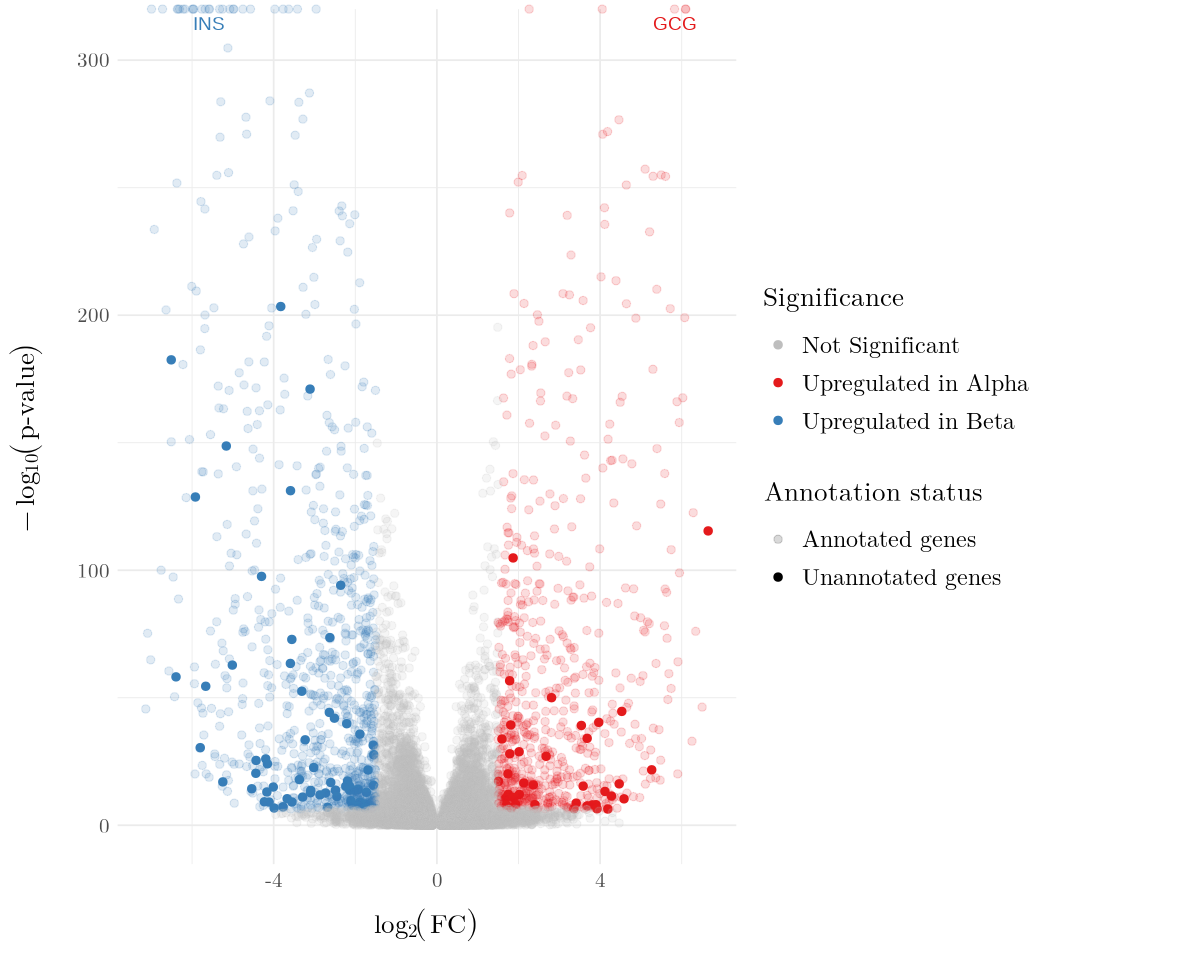

In [33]:
p

In [34]:
top_genes

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene_name,significance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
INS,0,-5.587374,0.932,1.00,0,INS,Upregulated in Beta
GCG,0,5.824695,0.998,0.97,0,GCG,Upregulated in Alpha


In [35]:
write.csv(markers_df, "../data_processed/VASAseq/alpha_vs_beta_gene_markers_df.csv", row.names = FALSE)